# Welcome to the NoisePy Colab Tutorial!

This tutorial will walk you through the basic steps of using NoisePy to compute ambient noise cross correlation functions.


First, we install the noisepy-seis package

In [6]:
!pip install noisepy-seis

  Using cached noisepy_seis-0.5.13-py3-none-any.whl (74 kB)
  Using cached pandas-2.0.0-cp39-cp39-win_amd64.whl (11.3 MB)
  Using cached h5py-3.8.0-cp39-cp39-win_amd64.whl (2.6 MB)
  Using cached numba-0.56.4-cp39-cp39-win_amd64.whl (2.5 MB)
  Using cached llvmlite-0.39.1-cp39-cp39-win_amd64.whl (23.2 MB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.38.0


ERROR: Cannot uninstall 'llvmlite'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


__Warning__: NoisePy uses ```obspy``` as a core Python module to manipulate seismic data. Restart the runtime now for proper installation of ```obspy``` on Colab.

Then we import the basic modules

In [8]:
from noisepy.seis import download, cross_correlate, stack, plotting_modules
import os
import glob

path = "/content/data"

SyntaxError: invalid syntax (1984604127.py, line 1)

## Step 0: download data

Use the function ```download``` with the following arguments: 
* ```path``` of where to put the data
* ``` channel list```: list of the seismic channels to download, and example is shown below
* ```station list```: list of the seismic stations (we need to change this to net.sta.loc.chan) 
* ```start time```: we need to change this to a datetime object
* ```end time```: we need to change this to a datetime object, or format it with a standard UTCDatetime

In [ ]:
download(path, ["BHE","BHN","BHZ"], ["ARV", "BAK"], ["2019_02_01_00_00_00"], ["2019_02_01_01_00_00"], 1)

Download
        From: 2019-02-01T00:00:00.000000Z
        To: 2019-02-01T01:00:00.000000Z
        Stations: ['ARV', 'BAK']
        Channels: ['BHE', 'BHN', 'BHZ']
        


Exception: ignored

Plot the raw data, make sure it's noise!

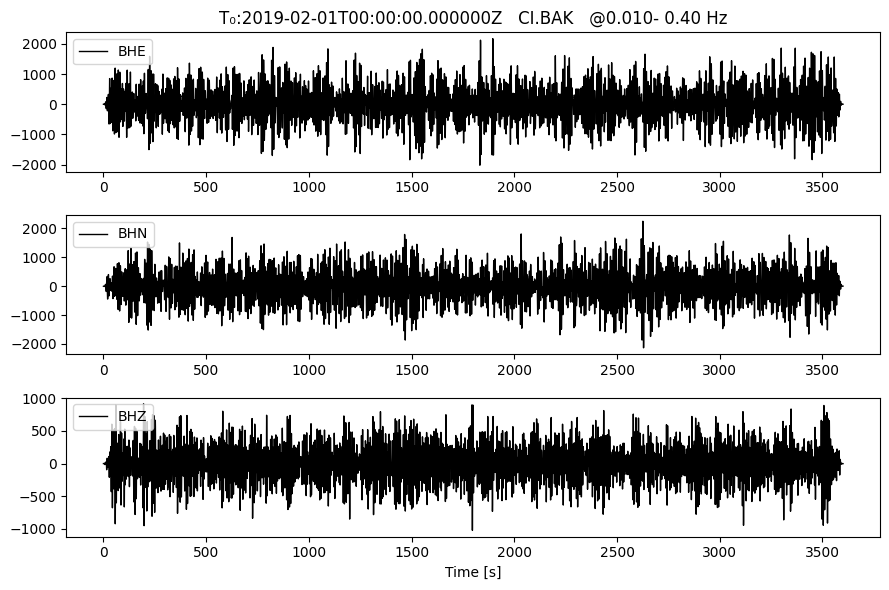

In [ ]:
file = os.path.join(path, "RAW_DATA/2019_02_01_00_00_00T2019_02_01_01_00_00.h5")
plotting_modules.plot_waveform(file,'CI','BAK',0.01,0.4)

## Step 1: Cross-correlation



In [ ]:
cross_correlate(path, "rma")

Plot the cross correlation

In [ ]:
file = os.path.join(path, 'CCF/2019_02_01_00_00_00T2019_02_01_01_00_00.h5')
plotting_modules.plot_substack_cc(file,0.1,0.2,200,True, os.path.join(path, "/Figures"))

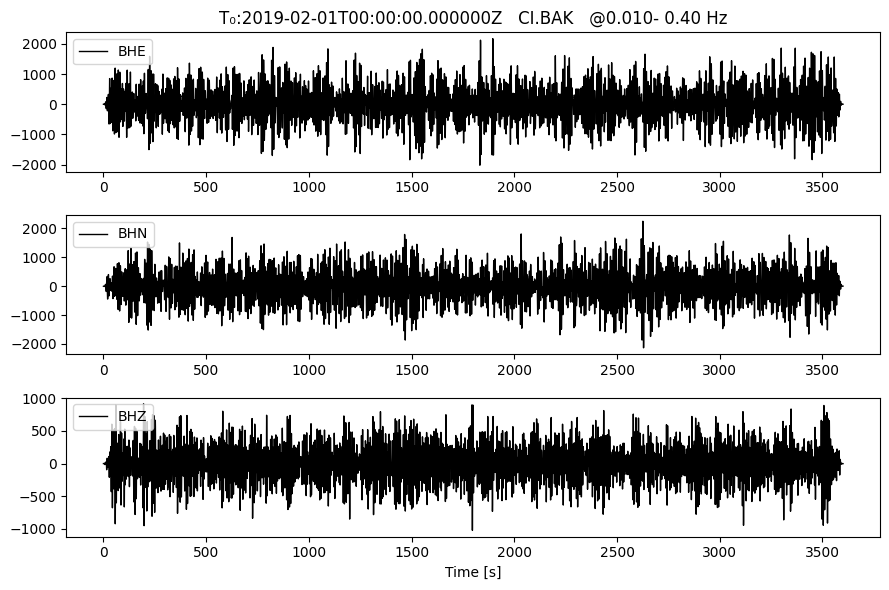

## Step 2: Stack the cross correlation

Provide a pathto where the data is.

In [ ]:
stack(path, "linear")

Plot the stacks

In [ ]:
files = glob.glob(os.path.join(path, 'STACK/*/*.h5'))
plotting_modules.plot_all_moveout(files, 'Allstack_linear', 0.1, 0.2, 'ZZ', 1)
